<a href="https://colab.research.google.com/github/Vaishnavi-TCD/TCD/blob/main/CV_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


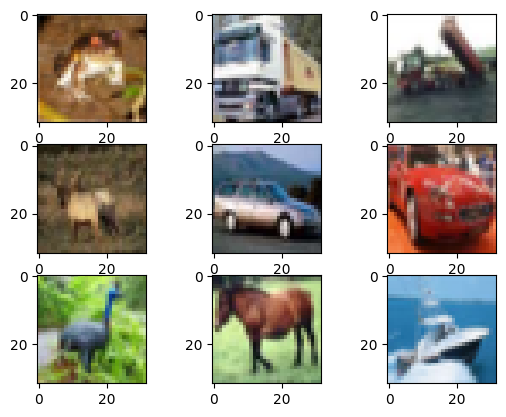

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()


In [ ]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
print("Single image shape:", x_train[0].shape)
print("Label shape:", y_train.shape)


Single image shape: (32, 32, 3)
Label shape: (50000, 1)


In [ ]:
import numpy as np
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)
print("Class labels:", np.unique(y_train))


Number of classes: 10
Class labels: [0 1 2 3 4 5 6 7 8 9]


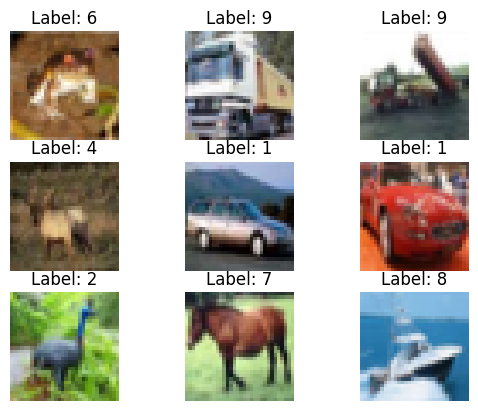

In [ ]:
import matplotlib.pyplot as plt

# Plot 9 sample images
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
plt.show()


6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: count, dtype: int64


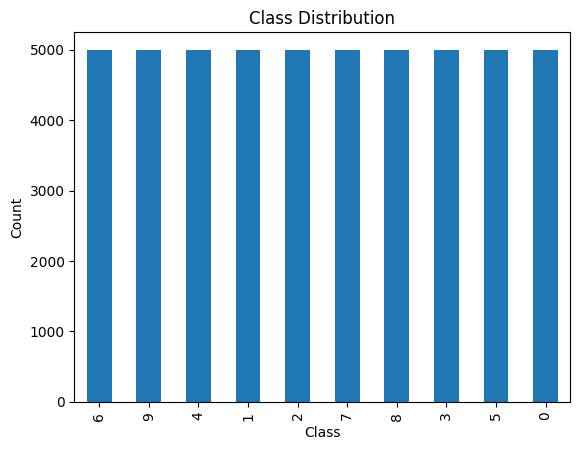

In [ ]:
import pandas as pd

# Count the occurrences of each class in the training set
class_counts = pd.Series(y_train.flatten()).value_counts()
print(class_counts)

# Plot distribution
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
print("Pixel value range in training set: Min =", x_train.min(), "Max =", x_train.max())


Pixel value range in training set: Min = 0 Max = 255


In [ ]:
print("Data type of x_train:", x_train.dtype)
print("Data type of y_train:", y_train.dtype)


Data type of x_train: uint8
Data type of y_train: uint8


In [ ]:
print("Dataset Summary:")
print("Training samples:", len(x_train))
print("Validation samples:", len(x_val) if 'x_val' in locals() else "None")
print("Test samples:", len(x_test))
print("Image shape:", x_train[0].shape)
print("Number of classes:", num_classes)


Dataset Summary:
Training samples: 50000
Validation samples: None
Test samples: 10000
Image shape: (32, 32, 3)
Number of classes: 10


In [ ]:
# normalize pixel values

x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
print("Pixel value range in training set: Min =", x_train.min(), "Max =", x_train.max())


Pixel value range in training set: Min = 0.0 Max = 1.0


In [ ]:
#attempt 2
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,  # Added zoom
    brightness_range=[0.8, 1.2]  # Adjust brightness
)
datagen.fit(x_train)

# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2  # Added L2 regularization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Increased dropout for better regularization

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Added extra layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Increased dropout

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # Increased neurons in dense layer
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Splitting Dataset
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile Model with Reduced Learning Rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reduced learning rate for better convergence

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for Learning Rate Adjustment and Early Stopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_val, y_val),
                    epochs=30,  # Increased epochs to allow the model more time to learn
                    callbacks=[lr_scheduler, early_stopping])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.0988 - loss: 3.1852 - val_accuracy: 0.0959 - val_loss: 2.7291 - learning_rate: 5.0000e-04
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 73s 35ms/step - accuracy: 0.1021 - loss: 2.7272 - val_accuracy: 0.1115 - val_loss: 2.6607 - learning_rate: 5.0000e-04
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.1040 - loss: 2.6523 - val_accuracy: 0.1041 - val_loss: 2.6846 - learning_rate: 5.0000e-04
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.1038 - loss: 2.5758 - val_accuracy: 0.0988 - val_loss: 2.5177 - learning_rate: 5.0000e-04
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.1054 - loss: 2.5028 - val_accuracy: 0.0989 - val_loss: 2.4943 - learning_rate: 5.0000e-04
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.1040 - loss: 2.4432 - val_accuracy: 0.1029 - val_loss: 2.4165 - learning_rate: 5.0000e-04
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━

In [1]:
# attempt 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Rotate images up to 15 degrees
    width_shift_range=0.1,  # Shift image width up to 10%
    height_shift_range=0.1,  # Shift image height up to 10%
    horizontal_flip=True  # Randomly flip images horizontally
)
datagen.fit(x_train)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,  # Increased epochs to allow for better learning
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.3392 - loss: 2.0129 - val_accuracy: 0.5732 - val_loss: 1.1952 - learning_rate: 0.0010
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5000 - loss: 1.5314

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.5000 - loss: 1.5314 - val_accuracy: 0.5745 - val_loss: 1.1910 - learning_rate: 0.0010
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 63s 51ms/step - accuracy: 0.5592 - loss: 1.2358 - val_accuracy: 0.6480 - val_loss: 0.9884 - learning_rate: 0.0010
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6094 - loss: 1.2515 - val_accuracy: 0.6509 - val_loss: 0.9806 - learning_rate: 0.0010
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.6288 - loss: 1.0422 - val_accuracy: 0.6344 - val_loss: 1.0683 - learning_rate: 0.0010
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.5625 - loss: 1.2230 - val_accuracy: 0.6379 - val_loss: 1.0567 - learning_rate: 0.0010
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6765 - loss: 0.9256 - val_accuracy: 0.6752 - val_loss: 0.9710 - learning_rate: 0.0010
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.7500 - loss: 0.7937 -

In [2]:
# Save the entire model to a file
model.save('cnn_image_classifier.h5')

print("Model saved successfully as 'cnn_image_classifier.h5'")


Model saved successfully as 'cnn_image_classifier.h5'


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.93      0.94      0.94      1000
           2       0.83      0.78      0.80      1000
           3       0.78      0.65      0.71      1000
           4       0.81      0.86      0.84      1000
           5       0.86      0.71      0.78      1000
           6       0.76      0.96      0.85      1000
           7       0.89      0.90      0.89      1000
           8       0.92      0.91      0.92      1000
           9       0.87      0.95      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



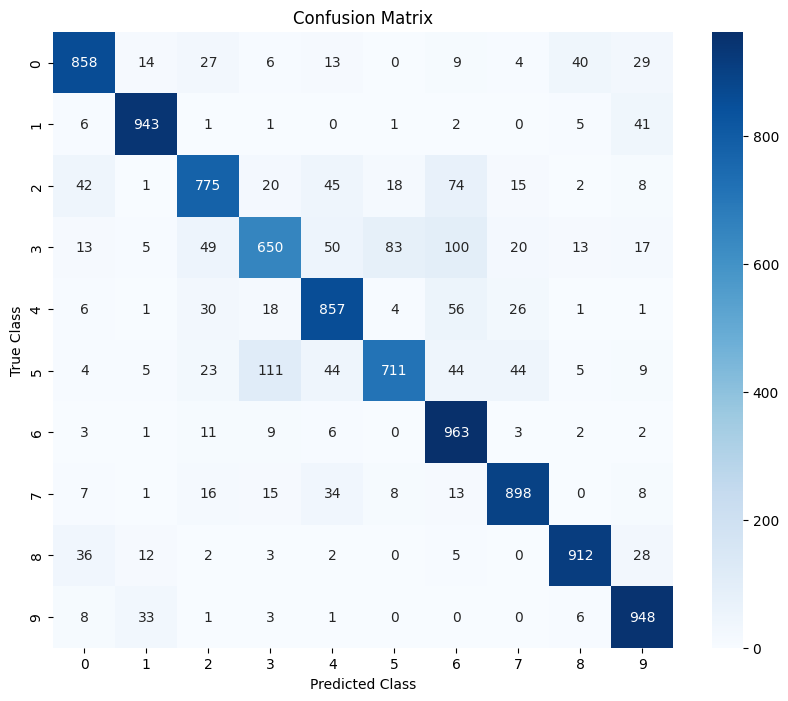

In [4]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


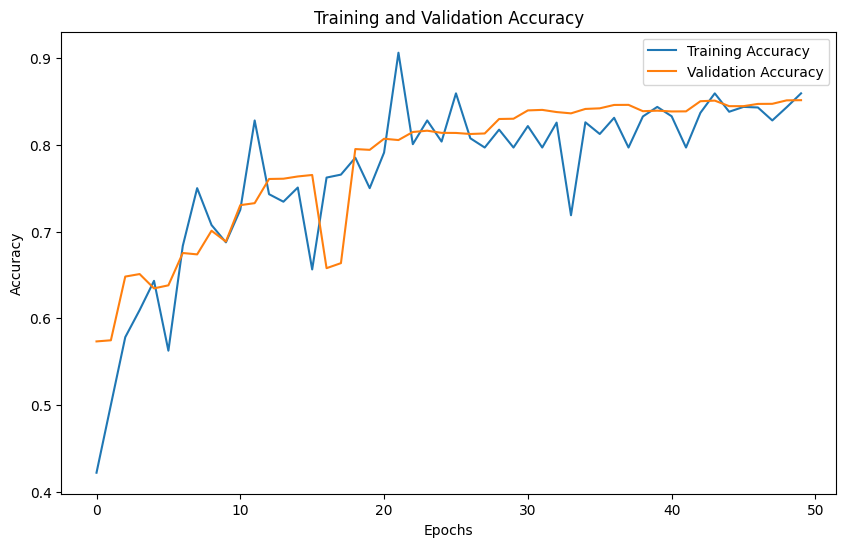

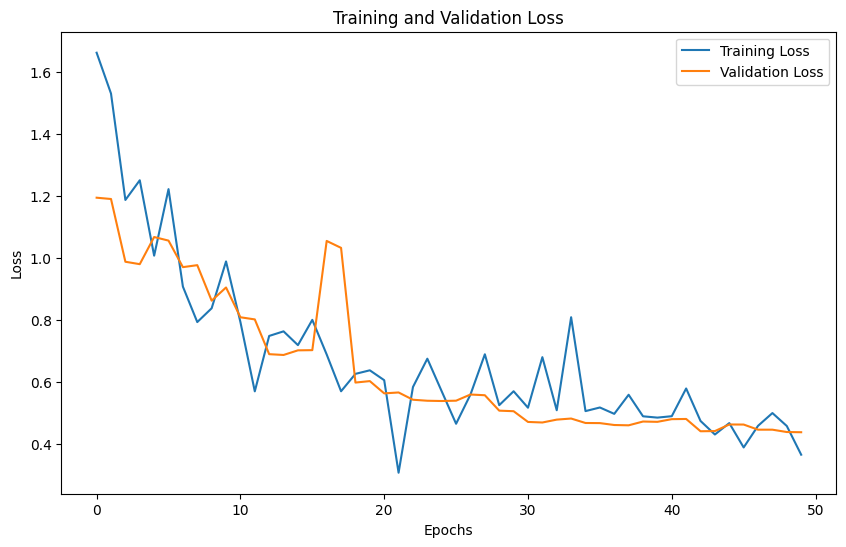

In [5]:
# Extract training history data
history_dict = history.history

# Plot training vs. validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
